# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: Domenico Muscillo

## Imports

Please do **not** import any other library.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [31]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [32]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [33]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [34]:
regions = list(df.region.unique())

In [35]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [36]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [37]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [38]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region].reset_index(drop=True)  # Standard indices give NaN when subtracted

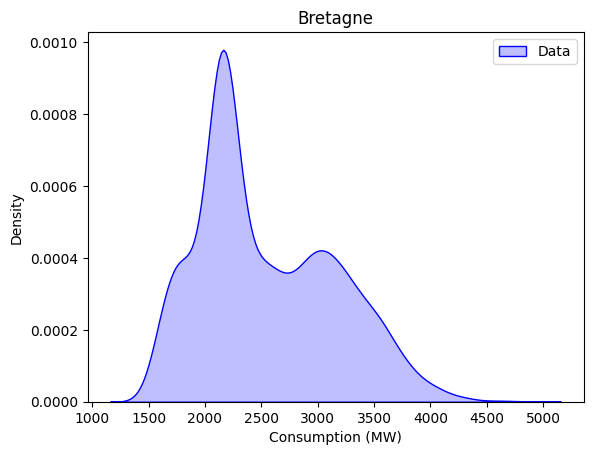

In [39]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:
1. Mean estimator: $E[\hat \mu] = \frac 1 n \sum_{i=1}^n E[x_i] = \frac 1 n \cdot n \cdot \mu = \mu$
2. Standard deviation estimator: first of all we rewrite the expression for $\hat{\sigma^2}$ as follows:
$$
\hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2 = \frac 1 {n-1} \bigg(\sum_{i=1}^n x_i^2 - 2\hat \mu \cdot \sum_{i=1}^n x_i + n\hat\mu^2\bigg) = \frac 1 {n-1} \bigg(\sum_{i=1}^n x_i^2 - n\hat\mu^2\bigg)
$$
We also need an expression for $E[\hat\mu^2]$:
$$
E[\hat\mu^2] = Var(\hat\mu) + E[\hat\mu]^2 = \sigma^2/n + \mu^2,
$$
where we used point 1 above for the mean of $\hat\mu$.
Finally we can conclude:
$$
E[\hat\sigma^2] = \frac 1 {n-1} \sum_{i=1}^n E[x_i^2] - nE[\hat\mu^2] = \frac 1 {n-1} \sum_{i=1}^n (\sigma^2 + \mu^2) - (\sigma^2 + n\mu^2) = \frac 1 {n-1} (n\sigma^2 + n\mu^2 - \sigma^2 - n\mu^2) = \sigma^2
$$

3. Give the values obtained for the mean and the standard deviation using these estimators.

In [40]:
import warnings
warnings.filterwarnings('ignore')

def update_model(data):
    n = len(data)
    mu = data["consumption"].mean()
    sigma_sq = 1/(n-1) * ((data["consumption"] - mu)**2).sum()
    std_dev = np.sqrt(sigma_sq)
    return mu, std_dev

mu, std_dev = update_model(df_region)

4. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [41]:
def generate_data(data):
    mu, std_dev = update_model(data)
    return pd.DataFrame(norm.rvs(loc=mu, scale=std_dev, size=len(data)), columns=["consumption"])

df_generated = generate_data(df_region)

5. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

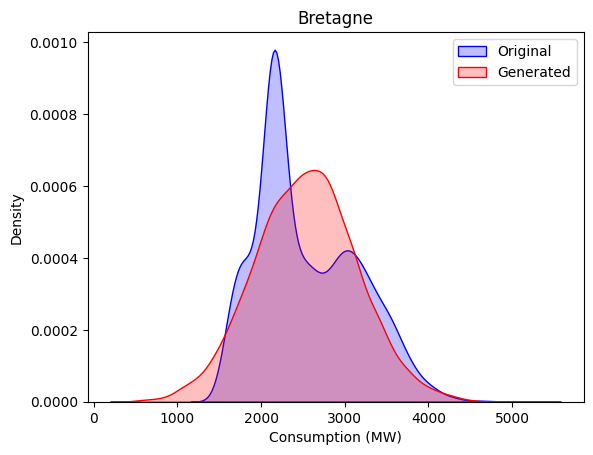

In [42]:
def plot_data(df1, df2, title=region):
    sns.kdeplot(data=df1, x="consumption", label="Original", color='blue', fill=True)
    sns.kdeplot(data=df2, x="consumption", label="Generated", color='red', fill=True)
    plt.title(title)
    plt.xlabel("Consumption (MW)")
    plt.legend()
    plt.show()
plot_data(df_region, df_generated)

6. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

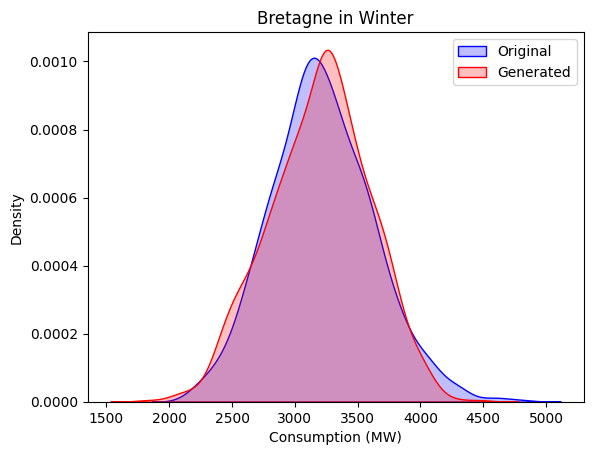

In [43]:
def is_winter(data):
    return ((data.date.dt.month == 12) & (data.date.dt.day >= 22)) | (data.date.dt.month <= 2) | ((data.date.dt.month == 3) & (data.date.dt.day <= 21))
df_region["date"] = pd.to_datetime(df_region["date"])

df_region_winter = df_region[is_winter(df_region)].reset_index(drop=True)

df_winter_generated = generate_data(df_region_winter)
plot_data(df_region_winter, df_winter_generated, title="Bretagne in Winter")

7. In which case the Gaussian model seems more appropriate?

The Gaussian model approximates best our data in this case because the power consumption is strictly correlated to the season. As we can see in winter the data has a unimodal distribution, unlike in the whole year, where we can clearly distinguish two peaks.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answer:
1. Because of the Jensen inequality and the monotonic property of the Lebesgue integral we can show that $0\leq d(f,g) \leq 1$:
$$
d(f,g) = \frac 1 2 \int{|f(x)-g(x)|dx} \leq \frac 1 2 (\int{|f(x)|dx} + \int{|g(x)|dx}) = \frac 1 2 \cdot 2 = 1
$$
and
$$
d(f,g) = \frac 1 2 \int{|f(x)-g(x)|dx} \geq \frac 1 2 |\int{f(x)-g(x)dx}| = \frac 1 2 |\int{f(x)dx}-\int{g(x)dx}| = 0
$$
2. We will now prove that $d(f,g)=0$ if and only if $f=g$ almost everywhere.
If $f=g$ almost everywhere $|f-g|=0$ almost everywhere by definition, thus $\int{|f(x)-g(x)|dx}=0$
Let us assume that $d(f,g)=0$: if there is a Lebesgue-measurable set $\Omega$ such that $f(x) \neq g(x)$ for any $x\in \Omega$, then $|f(x) - g(x)| > \epsilon$ for all $x\in \Omega$ for some $\epsilon>0$; thus
$$
d(f,g) = \frac 1 2 \int{|f(x)-g(x)|dx} > \frac 1 2 \int_\Omega{|f(x)-g(x)|dx} > \frac 1 2 \int_\Omega{\epsilon dx} = \frac{\epsilon|\Omega|}{2} > 0.
$$
3. We will now prove that $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.
Let $\mathrm{Supp}(h):=\{x\in \mathrm{Dom}(h)\quad s.t.\quad h(x)\neq 0\}$ be the support of the function $h$ and let us call $\Lambda:=\mathrm{Supp}(f)\cap \mathrm{Supp}(g)$; then if $\mathcal{L}(\Lambda) = 0$ we can write:
$$
d(f,g)=\frac 1 2 \int{|f(x)-g(x)|dx} = \frac 1 2 \bigg(\int_{\mathrm{Supp}(f)}{|f(x)|dx} + \int_{\mathrm{Supp}(g)}{|-g(x)|dx}\bigg) = \frac 1 2 \bigg(\int_{\mathrm{Supp}(f)}{f(x)dx} + \int_{\mathrm{Supp}(g)}{g(x)dx}\bigg) = 1.
$$
Let us now suppose that $\mathcal{L}(\Lambda) > 0$: since the max function is a Lebesgue measurable function we have that $F:=\{x\in \Lambda\quad s.t.\quad f(x) = max\{f(x), g(x)\}$ and $G:=\{x\in \Lambda\quad s.t.\quad g(x) = max\{f(x), g(x)\}$ are disjoint and have positive Lebesgue measure. Therefore:
$$
d(f,g) = \frac 1 2 \int{|f(x)-g(x)|dx} = \frac 1 2 \bigg(\int_{\mathrm{Supp}(f)\setminus G}{f(x)dx} + \int_{\mathrm{Supp}(g)\setminus F}{g(x)dx}\bigg) < \frac 1 2 \bigg(\int_{\mathrm{Supp}(f)}{f(x)dx} + \int_{\mathrm{Supp}(g)}{g(x)dx}\bigg) = 1
$$

4. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [44]:
# Define the distance function
def d(f, g):
    return 1/2 * np.sum(np.abs(f - g))

# Define the function that takes the dataframe and computes the dissimilarity between
# the consumption kde and the gaussian approximation
def evaluate_dissimilarity(data):
    mu, sigma = update_model(data)
    consumption = data["consumption"]
    density_model = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-1/(2*sigma**2)*(consumption - mu)**2)

    kde_data = gaussian_kde(consumption)
    density_data = kde_data.pdf(consumption)
    return d(density_model, density_data)

diss_region = evaluate_dissimilarity(df_region)

5. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [45]:
diss_winter = evaluate_dissimilarity(df_region_winter)

6. Do the same for all regions. Give the result as a single dataframe.

In [46]:
df_diss = df.groupby("region").apply(lambda d: evaluate_dissimilarity(d))
df_diss = pd.DataFrame(df_diss, columns=["dissimilarity"])

7. Which region is best fitted by a Gaussian model in winter?

In [47]:
region_of_best_fit = df_diss[df_diss.dissimilarity == df_diss.min().item()].index.item()

8. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

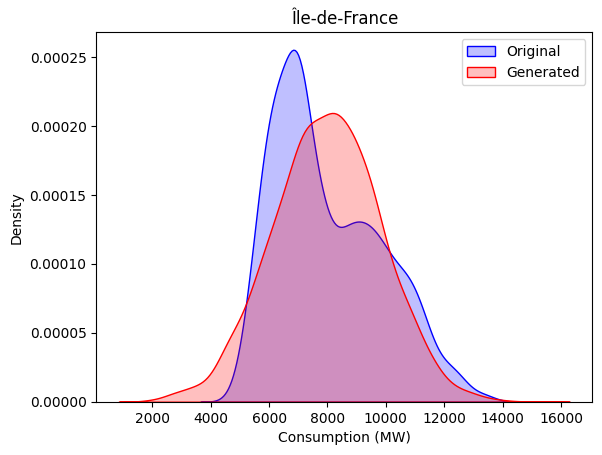

In [48]:
df_best_fit = df[df.region == region_of_best_fit]
df_best_fit_generated = generate_data(df_best_fit)
plot_data(df_best_fit, df_best_fit_generated, title=region_of_best_fit)

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$MW and standard deviation $\sigma_0=500$MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:
$\pi_0\sim \mathcal{N}(\mu_0, \sigma_0^2)$,
$X = \frac{X_1+\ldots+X_n}{n}\sim\mathcal{N}(\bar{x}, \sigma^2 / n)$,
$\pi(\mu | X) = \frac{\pi_0(\mu)\cdot \mathbb{P}(X | \mu)}{\int{\pi_0(\mu)\cdot \mathbb{P}(X | \mu)d\mu}}\propto
\pi_0(\mu)\cdot \mathbb{P}(X | \mu)=\pi_0(\mu)\cdot\mathbb{P}(X | \mu) =
\frac{1}{\sqrt{2\pi\sigma_0^2}}e^{-\frac{1}{2\sigma_0^2}(\mu - \mu_0)^2}\cdot\frac{1}{\sqrt{2\pi\sigma^2/n}}e^{-\frac{n}{2\sigma^2}(\mu - \bar{x})^2} \propto
e^{-\frac{1}{2}\big(\mu^2\bigg(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\bigg) - 2\mu\bigg(\frac{\mu_0}{\sigma_0^2} + \frac{n\bar{x}}{\sigma^2}\bigg)\big)}.$
By comparing the expression for the standard Gaussian distribution with the one we obtained now for the posterior pmf we understand that $\pi_{\mu|X} \sim \mathcal{N}(\mu_1, \sigma_1^2)$, where:
* $\sigma_1^2=\frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}} = \frac{\sigma^2\sigma_0^2}{\sigma^2+\sigma_0^2n}$
* $\mu_1=\sigma_1^2\cdot\bigg(\frac{\sigma^2\mu_0+n\bar{x}\sigma_0^2}{\sigma^2\sigma_0^2}\bigg) =
\frac{\sigma^2\mu_0+n\bar{x}\sigma_0^2}{\sigma^2+\sigma_0^2n} = \frac{\sigma^2}{\sigma^2+\sigma_0^2n}\mu_0 + \frac{\sigma_0^2n}{\sigma^2+\sigma_0^2n}\bar{x}$

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [49]:
sigma = 400
mu_0 = 3500
sigma_0 = 500
n = df_region_winter["consumption"].groupby([df_region_winter.date.dt.year]).size()
x_bar = df_region_winter["consumption"].groupby([df_region_winter.date.dt.year]).mean()
df_bayes = pd.DataFrame({"mean (MW)": (sigma**2 / (sigma**2 + n*sigma_0**2)) * mu_0 + (n*sigma_0**2 / (sigma**2 + n*sigma_0**2)) * x_bar, "std_dev (MW)": (sigma**2 * sigma_0**2 / (sigma**2 + n*sigma_0**2))**(1/2)})
print(df_bayes)

        mean (MW)  std_dev (MW)
date                           
2013  3343.413504     42.014582
2014  3118.424537     42.014582
2015  3167.398500     42.014582
2016  3207.507639     41.784716
2017  3251.224625     42.014582
2018  3315.081642     42.014582
2019  3195.200794     42.014582
2020  3145.504147     41.784716
2021  3341.946161     42.014582
2022  3165.081642     42.014582
2023  3117.547123     44.543540


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

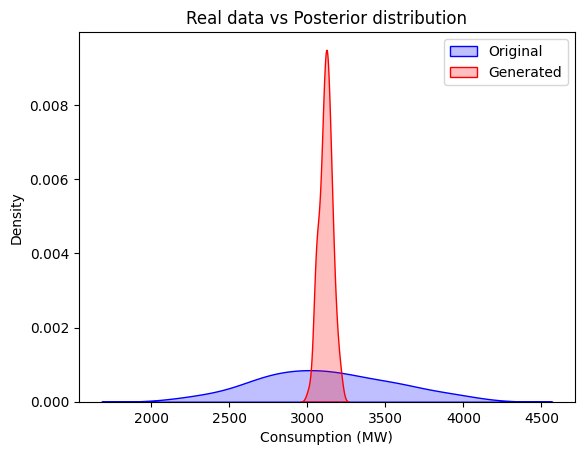

In [50]:
df_posterior = np.random.normal(loc=df_bayes.loc[2023, "mean (MW)"], scale=df_bayes.loc[2023, "std_dev (MW)"], size=n[2023])
df_posterior = pd.DataFrame(df_posterior, columns=["consumption"])
plot_data(df_region_winter[df_region_winter.date.dt.year == 2023], df_posterior, title="Real data vs Posterior distribution")

4. Discuss the results, comparing to those obtained in part A.

Your answer:

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:
The test will be two-tailed:
$$
H_0: \sigma^2=\sigma_0^2,\quad H_1: \sigma^2 != \sigma_0^2
$$
We will use a chi square test: since the mean of the random variables is known we have $n$ degrees of freedom, so we will use the following sample variance definition:
$$
S^2 = \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2
$$
The criterion for rejecting the null hypothesis is thus that $\chi_{obs}^2 \leq \chi_{\alpha/2, n}^2$ or $\chi_{obs}^2 \geq \chi_{1-\alpha/2, n}^2$, where $\chi_
{obs}^2=\frac{nS^2}{\sigma_0^2}$ and $\chi_{\alpha, n}$ is the $\alpha$-quantile of a chi square random variable with $n$ degrees of freedom.

2. Provide the result of this test for $\alpha=1\%$.

In [51]:
alpha = 0.01
mean = 3200
sigma_0 = 500
df_region_2023 = df_region[df_region.date.dt.year == 2023].consumption
n = len(df_region_2023)
# Reject H_0 ?
chi_obs = ((df_region_2023 - mean)**2).sum() / sigma_0**2
chi_obs <= chi2.ppf(alpha/2, df=n) or chi_obs >= chi2.ppf(1-alpha/2, df=n)

True

## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

,Bretagne consumption,Provence consumption
Bretagne consumption,1.00000,0.71678
Provence consumption,0.71678,1.00000


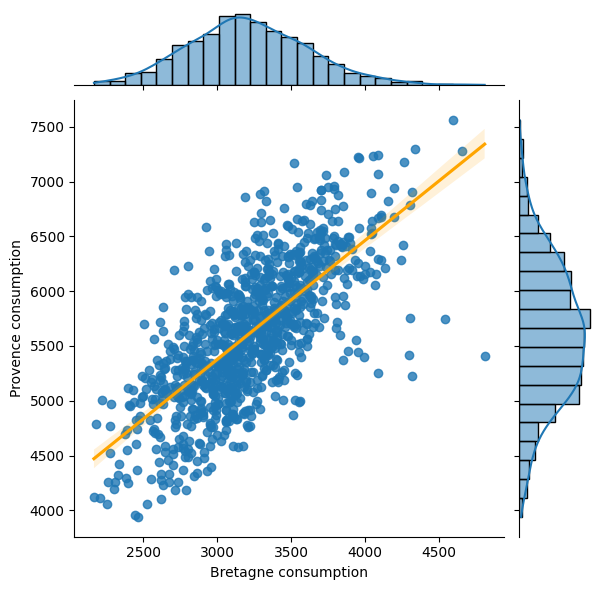

In [52]:
# Transform in datetime objects the dates in the original dataframe
df["date"] = pd.to_datetime(df["date"])

df_region_comparison = pd.DataFrame({"Bretagne consumption": df[(df.region == "Bretagne") & is_winter(df)].reset_index(drop=True).consumption,
                                     "Provence consumption": df[(df.region == "Provence-Alpes-Côte d'Azur") & is_winter(df)].reset_index(drop=True).consumption})
sns.jointplot(df_region_comparison, x="Bretagne consumption", y="Provence consumption", kind="reg", joint_kws={'line_kws':{'color':'orange'}})
df_region_comparison.corr()

2. Do you think the power consumption in these two regions is independent?

Your answer:
It is not independent since the correlation coefficient between the consumption in Bretagne and in Provence is $0.74$, which also corresponds to the regression line slope in figure.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:
We define our test as:
$$
H_0:\text{ power consumption in Provence and Bretagne is independent,}\quad H_1:\text{power consumption in Provence and Bretagne is not independent}
$$
We define our test statistics as:
$$
X^2 = \sum_{i,j}{\frac{(O_{ij}-E_{ij})^2}{E_{ij}}}\sim\chi^2((n-1)(m-1)),
$$
where $n$ is the number of categories in the first family, $m$ is the number of categories in the second family and $O$ and $E$ are defined as follows.
* The observed data $O_{ij}$ relative to interval $i$ of the first family and interval $j$ of the second family.
* The expected data $E_{ij}$, that is equal to the multiplication of the number of observations in the $i$th-row and the number of observations in the $j$th-column divided by the total number of elements in the table.
The expected data corresponds to the quantity we would have if the values of consumption in one region were to be independent of the distribution of power consumption in the other region.
We reject the null hypothesis if $X^2 \leq c_{(n-1)(m-1), 1-\alpha}$, that corresponds to the $1-\alpha$-quantile of a chi square random variable with $(n-1)(m-1)$ degrees of freedom.

4. Give the result of this test for $\alpha=1\%$. 

S = 14600063
c = 17972606.803247597
Reject H0? False


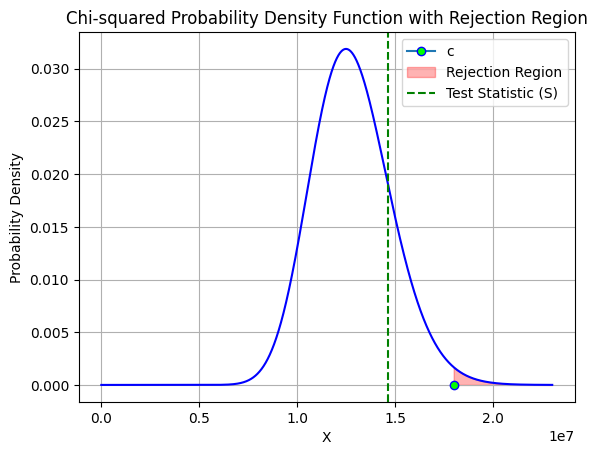

In [54]:
def winter_data(data):
    data_copy = data.copy()
    
    data_copy['date'] = pd.to_datetime(data_copy['date'])
    winter_datas = data_copy[((data_copy.date.dt.month == 12) & (data_copy.date.dt.day >= 22)) | (data_copy.date.dt.month <= 2) | ((data_copy.date.dt.month == 3) & (data_copy.date.dt.day <= 21))]
    return winter_datas


alpha = 0.01
mean = 3200

df_region_winter = winter_data(df_region)
df_region_winter['date'] = pd.to_datetime(df_region_winter['date'])
df_region_winter_2023 = df_region_winter[df_region_winter.date.dt.year == 2023]
n = len(df_region_winter_2023)
sigma_0 = 400

S = ((df_region_winter_2023.consumption - mean) ** 2).sum()
c = (sigma_0**2) * chi2.ppf(1 - alpha, df=n)

print("S =", S)
print("c =", c)
reject = S > c
print("Reject H0?", reject)

# plot the chi-squared pdf and the rejection region
x = np.linspace(0, 23000000, 10000)
pdf = chi2.pdf(x / (sigma_0**2), df=n)

plt.plot(x, pdf, color="b")
plt.plot(c, chi2.pdf(c, df=n), marker="o", markerfacecolor="lime", markeredgecolor="blue", label="c")
plt.fill_between(x, pdf, where=(x > c), color="red", alpha=0.3, label="Rejection Region")
plt.axvline(S, color="green", linestyle="dashed", label="Test Statistic (S)")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Chi-squared Probability Density Function with Rejection Region")
plt.legend()
plt.grid(True)

plt.show()

## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

In [170]:
alpha = 0.95
df_region_winter_2023 = df_region_winter[df_region_winter.date.dt.year == 2023]
n = len(df_region_winter_2023)
x_bar = df_region_winter_2023.consumption.mean()
s = np.sqrt(1/(n-1)*((df_region_winter_2023.consumption - x_bar)**2).sum())
# Confidence interval at level alpha = 95%
x_bar + s/np.sqrt(n)*t.ppf((1-alpha)/2, df=n-1), x_bar + s/np.sqrt(n)*t.ppf((1+alpha)/2, df=n-1)

(2988.42729171029, 3248.8804005974025)

2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [171]:
mu_0 = 3100
alpha = 0.05

# Reject hypothesis H_0 ?
(mu_0 <= x_bar + s/np.sqrt(n)*t.ppf(alpha/2, df=n-1)) or (mu_0 >= x_bar + s/np.sqrt(n)*t.ppf(1-alpha/2, df=n-1))

False